In [245]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from data_gathering import gather_data_actuals, gather_data_features
from mappings import map_country_id_to_country_name
import pickle

## Notebook for plotting the metrics results of the models

#### Setting the stage for plotting

Extract different subsets of countries

In [246]:
# Load 'Actuals' data
_, _, _, _, data_cm_actual_allyears \
    = gather_data_actuals()
# Load features data
_, _, _, _, data_cm_features_allyears \
    = gather_data_features()
# Determine all countries
actual_countries = data_cm_actual_allyears['country_id'].unique()
# Determine countries with at least one conflict fatality
feature_countries_non_zero = data_cm_features_allyears[data_cm_features_allyears['ged_sb'] > 0][
    'country_id'].unique()
# Determine countries which have at least one conflict fatality and are in the actuals data
feature_and_actuals_countries_non_zero = list(set(feature_countries_non_zero) & set(actual_countries))

# Load country list with countries above average quantile, in which at least one conflict fatality occured and which are in the actuals data
with open(fr'C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\data\feature_and_actuals_countries_non_zero_above_avg_quantile.pkl', 'rb') as f:
    feature_and_actuals_countries_non_zero_above_avg_quantile = pickle.load(f)

Loading the metrics results as dictionary structure (compare 'computing_error_metrics.ipynb')

In [250]:
model_identifiers_subset = ['baseline_f_m', 'baseline_f', 'model1', 'model2', 'model3', 'model4', 'model5']
model_scientific_identifiers_subset = ['$B_{HMV}$', '$B_{HV}$', '$M_{1, NB}$', '$M_{2, ZINB}$', '$M_{3, ZINB}$', '$M_{4, ZINB}$', '$M_{5, ZINB}$']
model_identifiers_all = ['baseline_f_m', 'baseline_f', 'model1', 'model2', 'model3', 'model4', 'model5']
# model_identifiers_all = ['baseline_f_m', 'baseline_f', 'model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7']
model_scientific_identifiers_all = ['$B_{HMV}$', '$B_{HV}$', '$M_{1, NB}$', '$M_{2, ZINB}$', '$M_{3, ZINB}$', '$M_{4, ZINB}$', '$M_{5, ZINB}$']
# model_scientific_identifiers_all = ['$B_{HMV}$', '$B_{HV}$', '$M_{1, NB}$', '$M_{2, ZINB}$', '$M_{3, ZINB}$', '$M_{4, ZINB}$', '$M_{5, ZINB}$', '$M_{6, ZINB}$', '$M_{7, ZINB}$']
score_types = ['crps', 'interval_score', 'ignorance_score']

In [251]:
# Read the parquet files back into dataframes, and store them in a dictionary
import_path = r'C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Results\\'
scores_dict_imp = {}
for model_identifier in model_identifiers_all:
    scores_dict_imp[model_identifier] = {}
    for score_type in score_types:
        scores_dict_imp[model_identifier][score_type] = {}
        for score_name in ['average_over_all_months', 'averages_per_month_and_year', 'averages_per_montg_year_and_country']:
            scores_dict_imp[model_identifier][score_type][score_name] = pd.read_parquet(import_path + f'metrics/{model_identifier}_{score_name}_{score_type}.parquet')

Loading the results as ungrouped dataframe (compare 'computing_error_metrics.ipynb')

In [252]:
# Import metrics_structured
metrics = pd.read_parquet(
    r'C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Results\metrics\metrics_structured.parquet')

Setting color themes for the plots

In [253]:
color_palette_blues = sns.color_palette('Blues_r', 10)
color_palette_crest = sns.color_palette('crest_r', 10)
color_palette_deep = sns.color_palette('deep', 10)
color_palette_viridis = sns.color_palette('viridis_r', 9)
default_blue_dark = color_palette_blues[0]
default_blue_light = color_palette_blues[6]
default_crest_color = color_palette_crest[2]

In [254]:
colors_lineplot = color_palette_viridis
# Define the color palette for the models using tab10 colors
model_color_palette = {
    '$B_{HMV}$': colors_lineplot[0],  # red-like color
    '$B_{HV}$': colors_lineplot[1],   # blue-like color
    '$M_{1, NB}$': colors_lineplot[2], # green-like color
    '$M_{2, ZINB}$': colors_lineplot[3], # orange-like color
    '$M_{3, ZINB}$': colors_lineplot[4], # purple-like color
    '$M_{4, ZINB}$': colors_lineplot[5], # brown-like color
    '$M_{5, ZINB}$': colors_lineplot[6],  # pink-like color
    '$M_{6, ZINB}$': colors_lineplot[7], 
    '$M_{7, ZINB}$': colors_lineplot[8],
}
colors_lineplot

[(0.741388, 0.873449, 0.149561),
 (0.477504, 0.821444, 0.318195),
 (0.266941, 0.748751, 0.440573),
 (0.134692, 0.658636, 0.517649),
 (0.128729, 0.563265, 0.551229),
 (0.163625, 0.471133, 0.558148),
 (0.206756, 0.371758, 0.553117),
 (0.253935, 0.265254, 0.529983),
 (0.282623, 0.140926, 0.457517)]

In [255]:
colors_lineplot = color_palette_deep
# Define the color palette for the models using tab10 colors
model_color_palette = {
    '$B_{HMV}$': colors_lineplot[0],  # red-like color
    '$B_{HV}$': colors_lineplot[1],   # blue-like color
    '$M_{1, NB}$': colors_lineplot[2], # green-like color
    '$M_{2, ZINB}$': colors_lineplot[3], # orange-like color
    '$M_{3, ZINB}$': colors_lineplot[4], # purple-like color
    '$M_{4, ZINB}$': colors_lineplot[5], # brown-like color
    '$M_{5, ZINB}$': colors_lineplot[6],  # pink-like color
    '$M_{6, ZINB}$': colors_lineplot[8],
    '$M_{7, ZINB}$': colors_lineplot[9],
}
colors_lineplot

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

Setting Score information for plot

In [256]:
score_types = ['crps', 'interval_score', 'ignorance_score']
score_names = ['CRPS', 'Interval Score', 'Ignorance Score']
score_info = list(zip(score_types, score_names))
score_index = 1

Processing the results from dictionary for plotting

In [258]:
# Process the dataframes under key 'averages_per_month_and_year' in scores_dict_imp such that the result is one dataframe with the yearly scores for each model and score type, introduce a new columns 'model', 'score_type', '2018', '2019', '2020', '2021', 'Year Average'
year_results_by_model = pd.DataFrame(columns=['model', 'score_type', '2018', '2019', '2020', '2021', 'Year Average'])
# Access the dictionary corresponding to a specific model 
for model_identifier, model_dict in scores_dict_imp.items():
    # Access the dictionary corresponding to a specific score type within the model dictionary
    for score_type, score_dict in model_dict.items():
        # Get the values of 'Year Average' for each year
        year_score_2018 = score_dict['averages_per_month_and_year'].loc[score_dict['averages_per_month_and_year']['Year'] == 2018, 'Year Average'].values[0]
        year_score_2019 = score_dict['averages_per_month_and_year'].loc[score_dict['averages_per_month_and_year']['Year'] == 2019, 'Year Average'].values[0]
        year_score_2020 = score_dict['averages_per_month_and_year'].loc[score_dict['averages_per_month_and_year']['Year'] == 2020, 'Year Average'].values[0]
        year_score_2021 = score_dict['averages_per_month_and_year'].loc[score_dict['averages_per_month_and_year']['Year'] == 2021, 'Year Average'].values[0]
        year_scores = [year_score_2018, year_score_2019, year_score_2020, year_score_2021]
        # Append the values to the dataframe
        year_results_by_model = year_results_by_model.append({
            'model': model_identifier,
            'score_type': score_type,
            '2018': year_score_2018,
            '2019': year_score_2019,
            '2020': year_score_2020,
            '2021': year_score_2021,
            'Year Average': np.mean(year_scores)
        }, ignore_index=True)

In [259]:
# Process the dataframes under key 'averages_per_month_and_year' in scores_dict_imp such that the result is one dataframe with the monthly scores of each year by model and score type
month_results_by_model = pd.DataFrame(columns=['model', 'score_type', 'year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
# Access the dictionary corresponding to a specific model
for model_identifier, model_dict in scores_dict_imp.items():
    # Access the dictionary corresponding to a specific score type within the model dictionary
    for score_type, score_dict in model_dict.items():
        # Access the monthly scores for each year
        for year in [2018, 2019, 2020, 2021]:
            # Get the monthly scores for each year
            month_scores = score_dict['averages_per_month_and_year'].loc[score_dict['averages_per_month_and_year']['Year'] == year, 'Jan':'Dec'].values[0]
            # Append the values to the dataframe
            month_results_by_model = month_results_by_model.append({
                'model': model_identifier,
                'score_type': score_type,
                'year': year,
                'Jan': month_scores[0],
                'Feb': month_scores[1],
                'Mar': month_scores[2],
                'Apr': month_scores[3],
                'May': month_scores[4],
                'Jun': month_scores[5],
                'Jul': month_scores[6],
                'Aug': month_scores[7],
                'Sep': month_scores[8],
                'Oct': month_scores[9],
                'Nov': month_scores[10],
                'Dec': month_scores[11]
            }, ignore_index=True)

#### Function for plotting the results

**Line plot of error metrics**

In [261]:
def plot_model_scores_scientific_labels(df, score_type, model_identifiers, scientific_identifiers, scientific_score, title, color_palette):
    """
    Plot the time series of the specified score type for each model in the model_identifiers list using Seaborn,
    with custom scientific labels for the models.

    :param df: DataFrame containing the model scores.
    :param score_type: The type of score to plot (e.g., 'crps', 'interval_score').
    :param model_identifiers: List of model identifiers to include in the plot.
    :param scientific_identifiers: List of scientific labels corresponding to the models.
    """
    # Ensure the lists are of the same length
    if len(model_identifiers) != len(scientific_identifiers):
        raise ValueError("The length of model_identifiers and scientific_identifiers must be the same.")

    # Filter the dataframe
    filtered_df = df[(df['score_type'] == score_type) & (df['model'].isin(model_identifiers))]

    # Prepare the data for plotting
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    years = sorted(filtered_df['year'].unique())
    time_series = pd.DataFrame()

    for year in years:
        for month in months:
            temp_df = filtered_df[filtered_df['year'] == year][['model', month]]
            temp_df['date'] = f"{month}-{year}"
            temp_df.rename(columns={month: 'score'}, inplace=True)
            time_series = pd.concat([time_series, temp_df])

    time_series['date'] = pd.to_datetime(time_series['date'], format='%b-%Y')

    # Map the model identifiers to their scientific labels
    model_to_scientific = dict(zip(model_identifiers, scientific_identifiers))
    time_series['model'] = time_series['model'].map(model_to_scientific)

    # Use the defined color palette
    colors = {model: color_palette[model] for model in model_to_scientific.values()}

    # Plot using seaborn with the defined color palette
    plt.figure(figsize=(15, 8))
    ax = sns.lineplot(data=time_series, x='date', y='score', hue='model', linestyle='--', marker='o', palette=colors)

   # Formatting the x-axis labels
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Adjust interval as needed
    plt.xticks(rotation=45)

    plt.xlabel('Date')
    plt.ylabel(scientific_score)
    plt.grid(False)
    plt.title(title)
    plt.legend(title='Model')
    plt.show()

**Boxplot of error metrics with option to (i) truncate the y-axis and (ii) use a log scale**

#### Making the plots

**Line plot of error metrics**

All models

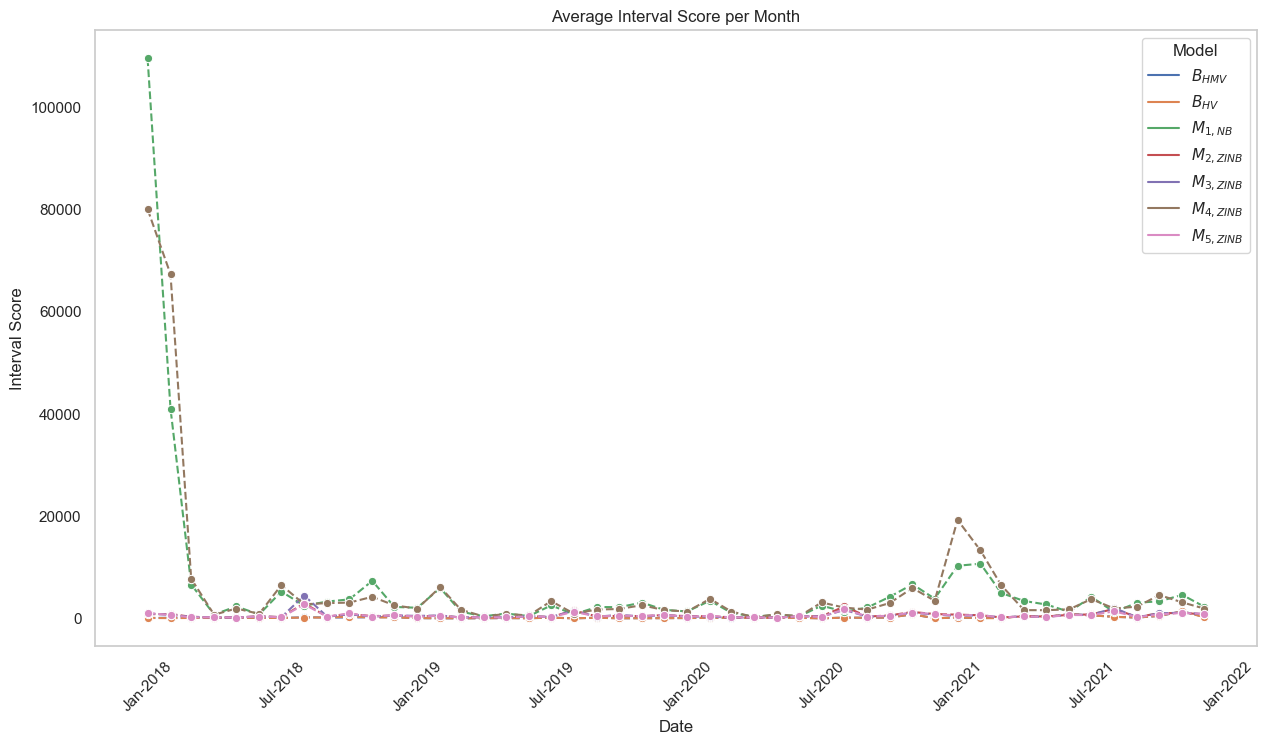

In [265]:
title = f'Average {score_info[score_index][1]} per Month'
plot_model_scores_scientific_labels(month_results_by_model, score_info[score_index][0], model_identifiers_all, model_scientific_identifiers_all, score_info[score_index][1], title)
# Plot for B, M2, M3, M5

Subset of models

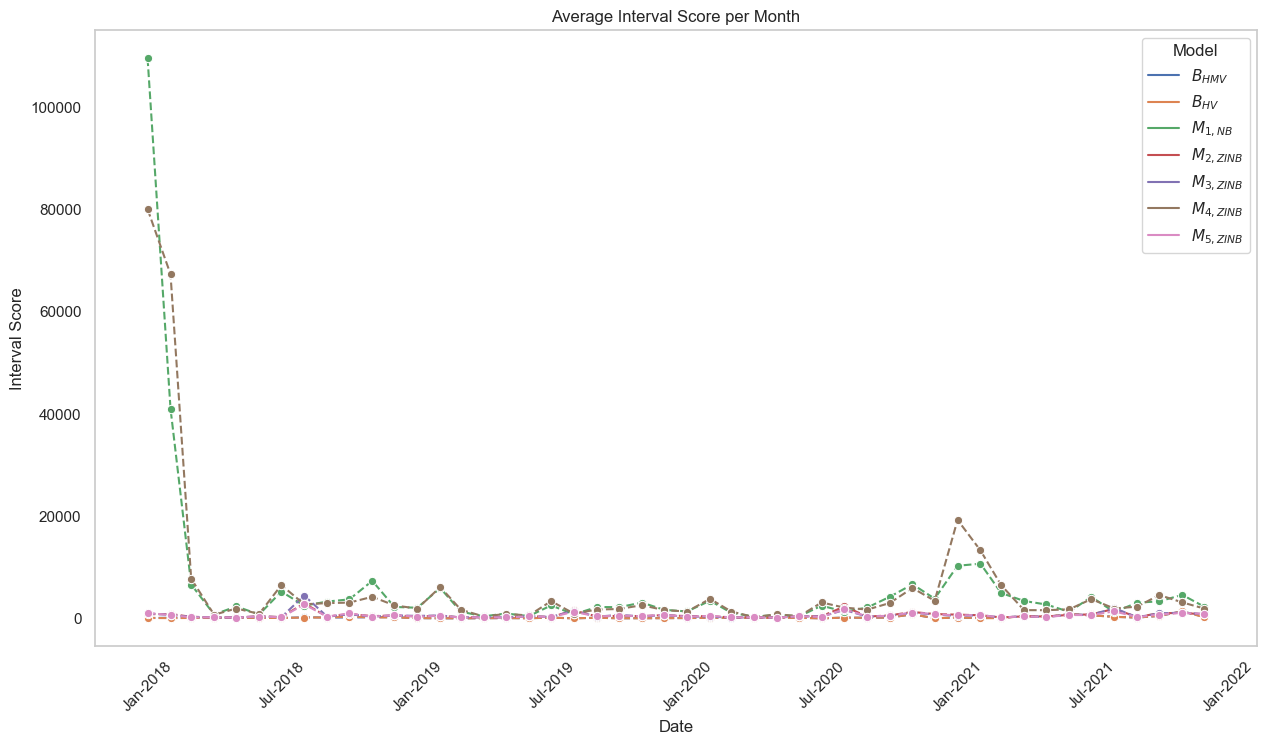

In [266]:
title = f'Average {score_info[score_index][1]} per Month'
plot_model_scores_scientific_labels(month_results_by_model, score_info[score_index][0], model_identifiers_subset, model_scientific_identifiers_subset, score_info[score_index][1], title)

**Boxplot of error metrics**

Boxplots of error metric for subset of countries: (i) all data (ii) truncated

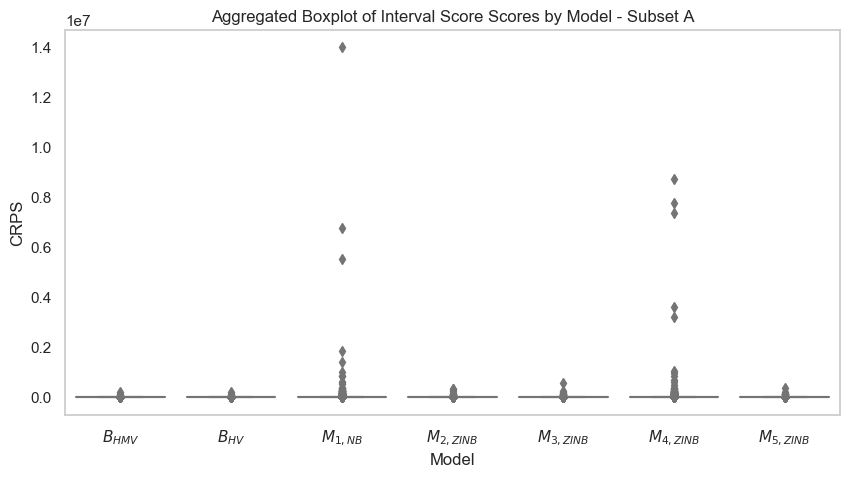

In [270]:
title = f'Aggregated Boxplot of {score_info[score_index][1]} Scores by Model - Subset A'
scientific_score = 'CRPS'
plot_aggregated_boxplots(metrics, score_info[score_index][0], model_identifiers_all, model_scientific_identifiers_all, scientific_score=scientific_score, color=default_blue_light, title=title, country_filter=feature_and_actuals_countries_non_zero)

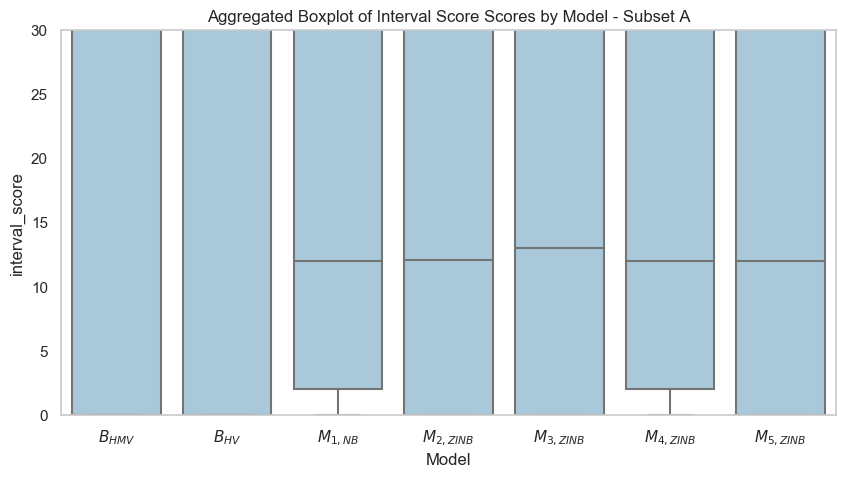

In [271]:
title = f'Aggregated Boxplot of {score_info[score_index][1]} Scores by Model - Subset A'
plot_aggregated_boxplots(metrics, score_info[score_index][0], model_identifiers_all, model_scientific_identifiers_all, scientific_score=score_info[score_index][0], color=default_blue_light, title=title, country_filter=feature_and_actuals_countries_non_zero, scale='truncated', truncation=30)

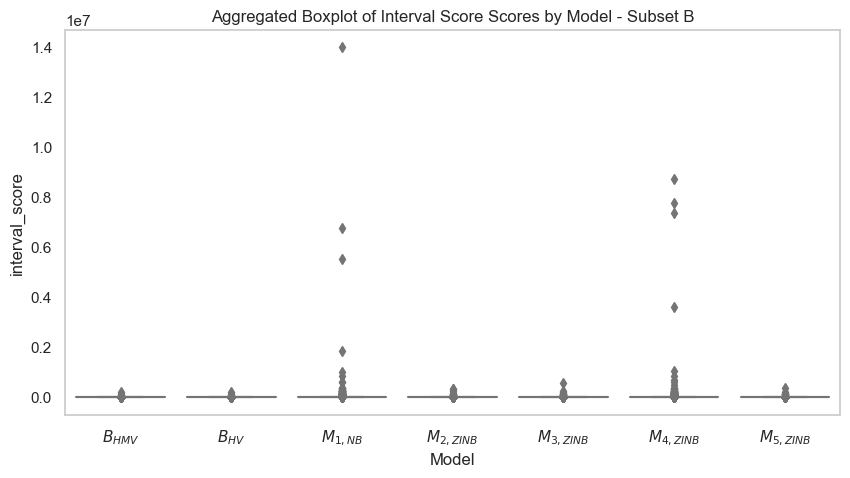

In [272]:
title = f'Aggregated Boxplot of {score_info[score_index][1]} Scores by Model - Subset B'
plot_aggregated_boxplots(metrics, score_info[score_index][0], model_identifiers_all, model_scientific_identifiers_all, scientific_score=score_info[score_index][0], color=default_blue_light, title=title,  fat_bigger_than=0, country_filter=feature_and_actuals_countries_non_zero)

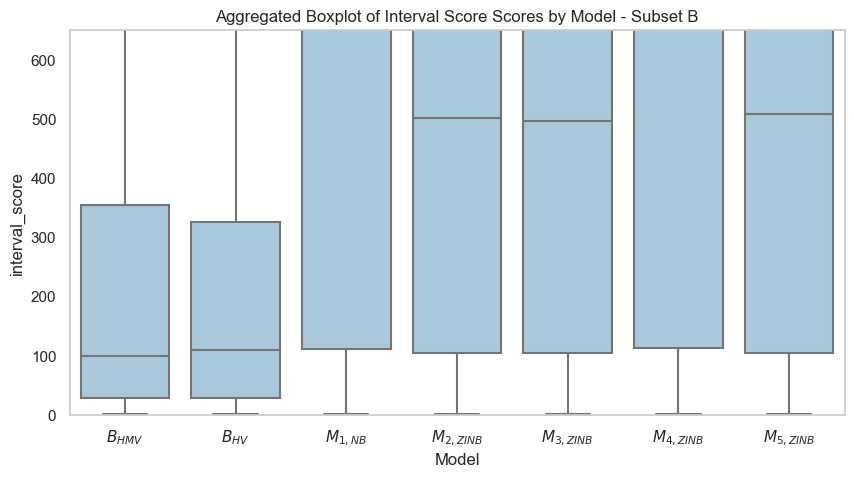

In [273]:
title = f'Aggregated Boxplot of {score_info[score_index][1]} Scores by Model - Subset B'
plot_aggregated_boxplots(metrics, score_info[score_index][0], model_identifiers_all, model_scientific_identifiers_all, scientific_score=score_info[score_index][0],  color=default_blue_light, title=title, fat_bigger_than=0, country_filter=feature_and_actuals_countries_non_zero, scale='truncated', truncation=650)

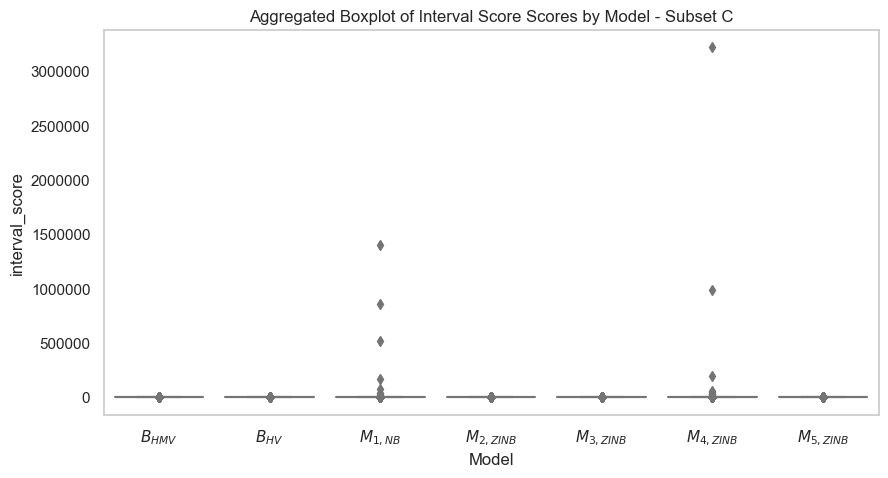

In [274]:
title = f'Aggregated Boxplot of {score_info[score_index][1]} Scores by Model - Subset C'
plot_aggregated_boxplots(metrics, score_info[score_index][0], model_identifiers_all, model_scientific_identifiers_all,scientific_score= score_info[score_index][0], color=default_blue_light,title=title, fat_smaller_than=1, country_filter=feature_and_actuals_countries_non_zero)

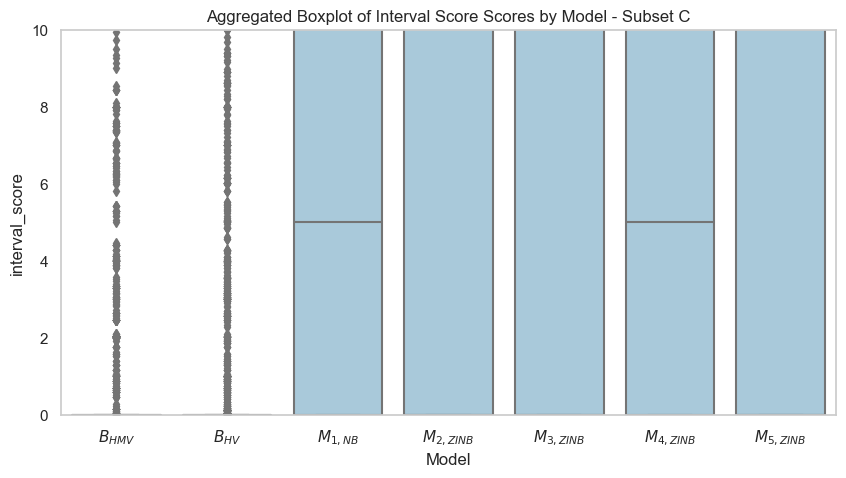

In [275]:
title=f'Aggregated Boxplot of {score_info[score_index][1]} Scores by Model - Subset C'
plot_aggregated_boxplots(metrics, score_info[score_index][0], model_identifiers_all, model_scientific_identifiers_all, scientific_score=score_info[score_index][0], color=default_blue_light, title=title, fat_smaller_than=1, country_filter=feature_and_actuals_countries_non_zero, scale='truncated', truncation=10)

### Analysing metric results based on quantiles

In [116]:
# Get the rows with the 100 highest crps scores for model1 and model4 and extract the corresponding country ids
model1_100_highest_crps = metrics[metrics['model_identifier'] == 'model1'].sort_values(by='crps', ascending=False).head(100)
model4_100_highest_crps = metrics[metrics['model_identifier'] == 'model4'].sort_values(by='crps', ascending=False).head(100)
model1_100_highest_crps_country_ids = model1_100_highest_crps['country_id'].unique()
model4_100_highest_crps_country_ids = model4_100_highest_crps['country_id'].unique()

In [117]:
model1_100_highest_crps_country_names = [map_country_id_to_country_name(country_id) for country_id in model1_100_highest_crps_country_ids]
model4_100_highest_crps_country_names = [map_country_id_to_country_name(country_id) for country_id in model4_100_highest_crps_country_ids]

In [118]:
# Compute the average fatalities for each country in the 100 highest crps scores for model1 and model4
model1_100_highest_crps_avg_fatalities = model1_100_highest_crps['ged_sb'].mean()
model4_100_highest_crps_avg_fatalities = model4_100_highest_crps['ged_sb'].mean()

In [119]:
# Compute the 99th percentile of crps score for model1 and model4
model1_99th_percentile_crps = metrics[metrics['model_identifier'] == 'model1']['crps'].quantile(0.99)
model4_99th_percentile_crps = metrics[metrics['model_identifier'] == 'model4']['crps'].quantile(0.99)

In [120]:
# Filter the dataframe on observations above the 99th percentile of crps score for model1 and model4
model1_above_99th_percentile_crps = metrics[(metrics['model_identifier'] == 'model1') & (metrics['crps'] > model1_99th_percentile_crps)]
model4_above_99th_percentile_crps = metrics[(metrics['model_identifier'] == 'model4') & (metrics['crps'] > model4_99th_percentile_crps)]

In [121]:
# Extract the country ids for which the crps score is above the 99th percentile for model1 and model4
model1_99th_percentile_crps_country_ids = model1_above_99th_percentile_crps['country_id'].unique()
model4_99th_percentile_crps_country_ids = model4_above_99th_percentile_crps['country_id'].unique()
# Map those contry ids to their country names
model1_99th_percentile_crps_country_names = [map_country_id_to_country_name(country_id) for country_id in model1_99th_percentile_crps_country_ids]
model4_99th_percentile_crps_country_names = [map_country_id_to_country_name(country_id) for country_id in model4_99th_percentile_crps_country_ids]

In [122]:
model1_100_highest_crps

,country_id,month_id,crps,interval_score,ignorance_score,model_identifier,ged_sb
23424,120,457,140829.365268,13996687.3,5.053732,model1,74.0
20976,60,457,117434.252780,6771442.4,5.003106,model1,148.0
20977,60,458,99447.832637,5532598.8,5.014950,model1,89.0
23425,120,458,48353.232814,1856926.3,4.307131,model1,145.0
27494,246,495,35208.813050,625425.2,4.264213,model1,4.0
...,...,...,...,...,...,...,...
23655,124,496,2014.504936,4686.8,2.729352,model1,2793.0
26854,220,479,1937.030188,79419.8,4.626439,model1,476.0
23462,120,495,1897.927405,94978.6,4.321928,model1,169.0
24059,133,468,1877.507784,19708.4,2.528928,model1,2421.0


In [186]:
model4_above_99th_percentile_crps

,country_id,month_id,crps,interval_score,ignorance_score,model_identifier,ged_sb
48425,57,498,2602.024947,49309.00,9.975848,model4,2664.0
48480,60,457,123791.483158,7770972.40,4.307745,model4,148.0
48481,60,458,127339.676470,8741140.75,5.457940,model4,89.0
48482,60,459,23986.882519,1055280.45,4.469827,model4,139.0
48484,60,461,4596.730797,209231.70,4.716413,model4,91.0
...,...,...,...,...,...,...,...
55002,246,499,5599.981420,136892.00,4.842261,model4,5.0
55003,246,500,5851.293427,184174.50,4.361138,model4,32.0
55004,246,501,8916.073450,171471.00,4.757773,model4,65.0
55005,246,502,18291.336816,383991.00,4.094637,model4,2.0


In [123]:
model1_above_99th_percentile_crps

,country_id,month_id,crps,interval_score,ignorance_score,model_identifier,ged_sb
20921,57,498,2601.673547,49534.15,8.393748,model1,2664.0
20976,60,457,117434.252780,6771442.40,5.003106,model1,148.0
20977,60,458,99447.832637,5532598.80,5.014950,model1,89.0
20978,60,459,21347.565993,850056.40,4.382049,model1,139.0
20980,60,461,5020.985473,248416.85,4.914159,model1,91.0
...,...,...,...,...,...,...,...
27498,246,499,10143.853314,260631.50,4.213779,model1,5.0
27499,246,500,3473.567272,94848.80,4.729352,model1,32.0
27500,246,501,11672.291332,235970.00,4.759213,model1,65.0
27501,246,502,9136.475558,177955.60,3.949176,model1,2.0


In [129]:
# Print some information that can be extracted from the 99th percentile of crps score for model1 and model4: 99th percentile of CRPS Score, Countries with crps score above 99th percentile, QUantiles of fatalities for countries with crps score above 99th percentile
print(f"99th percentile of CRPS Score for model1: \n {model1_99th_percentile_crps}")
print(f"99th percentile of CRPS Score for model4: \n {model4_99th_percentile_crps}")
print(f"Countries with crps score above 99th percentile for model1: \n {model1_99th_percentile_crps_country_names} of which 6 of 10 are within the top 10 countries")
print(f"Countries with crps score above 99th percentile for model4: \n {model4_99th_percentile_crps_country_names} of which 6 of 11 are within the top 10 countries")
print(f"Quantiles of fatalities for countries with crps score above 99th percentile for model1: \n {model1_above_99th_percentile_crps['ged_sb'].quantile([0.25, 0.5, 0.75])}")
print(f"Quantiles of fatalities for countries with crps score above 99th percentile for model4: \n {model4_above_99th_percentile_crps['ged_sb'].quantile([0.25, 0.5, 0.75])}")

99th percentile of CRPS Score for model1: 
 2092.9430229205627
99th percentile of CRPS Score for model4: 
 2077.81671879305
Countries with crps score above 99th percentile for model1: 
 ['Ethiopia', 'Iraq', 'Nigeria', 'Somalia', 'Yemen', 'Azerbaijan', 'Afghanistan', 'Congo, DRC', 'Syria', 'South Sudan'] of which 6 of 10 are within the top 10 countries
Countries with crps score above 99th percentile for model4: 
 ['Ethiopia', 'Iraq', 'Nigeria', 'Somalia', 'Yemen', 'Azerbaijan', 'Afghanistan', 'Philippines', 'Congo, DRC', 'Syria', 'South Sudan'] of which 6 of 11 are within the top 10 countries
Quantiles of fatalities for countries with crps score above 99th percentile for model1: 
 0.25      84.75
0.50     215.00
0.75    2317.75
Name: ged_sb, dtype: float64
Quantiles of fatalities for countries with crps score above 99th percentile for model4: 
 0.25      81.50
0.50     209.50
0.75    2343.25
Name: ged_sb, dtype: float64


In [132]:
# Calculate the 99th percentile of crps score for each model
model1_99th_percentile_crps = metrics[metrics['model_identifier'] == 'model1']['crps'].quantile(0.99)
model2_99th_percentile_crps = metrics[metrics['model_identifier'] == 'model2']['crps'].quantile(0.99)
model3_99th_percentile_crps = metrics[metrics['model_identifier'] == 'model3']['crps'].quantile(0.99)
model4_99th_percentile_crps = metrics[metrics['model_identifier'] == 'model4']['crps'].quantile(0.99)
model5_99th_percentile_crps = metrics[metrics['model_identifier'] == 'model5']['crps'].quantile(0.99)


In [133]:
# Calculate the mean of the CRPS score for every model excluding the obersations with a crps score above the models 99th percentile
model1_mean_crps_excluding_99th_percentile = metrics[(metrics['model_identifier'] == 'model1') & (metrics['crps'] <= model1_99th_percentile_crps)]['crps'].mean()
model2_mean_crps_excluding_99th_percentile = metrics[(metrics['model_identifier'] == 'model2') & (metrics['crps'] <= model2_99th_percentile_crps)]['crps'].mean()
model3_mean_crps_excluding_99th_percentile = metrics[(metrics['model_identifier'] == 'model3') & (metrics['crps'] <= model3_99th_percentile_crps)]['crps'].mean()
model4_mean_crps_excluding_99th_percentile = metrics[(metrics['model_identifier'] == 'model4') & (metrics['crps'] <= model4_99th_percentile_crps)]['crps'].mean()
model5_mean_crps_excluding_99th_percentile = metrics[(metrics['model_identifier'] == 'model5') & (metrics['crps'] <= model5_99th_percentile_crps)]['crps'].mean()
# Store them in a list
model_mean_crps_excluding_99th_percentile = [model1_mean_crps_excluding_99th_percentile, model2_mean_crps_excluding_99th_percentile, model3_mean_crps_excluding_99th_percentile, model4_mean_crps_excluding_99th_percentile, model5_mean_crps_excluding_99th_percentile]; model_mean_crps_excluding_99th_percentile

[28.08451026549977,
 12.003920808364361,
 11.903942385648001,
 27.663893294036452,
 11.775383122428737]

In [136]:
# Calculate the quantiles of the crps scores fro each model
model5_crps_quantiles = metrics[metrics['model_identifier'] == 'model5']['crps'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
model2_crps_quantiles = metrics[metrics['model_identifier'] == 'model2']['crps'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
model1_crps_quantiles = metrics[metrics['model_identifier'] == 'model1']['crps'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
model3_crps_quantiles = metrics[metrics['model_identifier'] == 'model3']['crps'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
model4_crps_quantiles = metrics[metrics['model_identifier'] == 'model4']['crps'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
# Truncate the values to 4 decimals
model1_crps_quantiles = model1_crps_quantiles.round(4)
model2_crps_quantiles = model2_crps_quantiles.round(4)
model3_crps_quantiles = model3_crps_quantiles.round(4)
model4_crps_quantiles = model4_crps_quantiles.round(4)
model5_crps_quantiles = model5_crps_quantiles.round(4)

# Store the quantiles in a dataframe
model_crps_quantiles = pd.DataFrame({'model1': model1_crps_quantiles, 'model2': model2_crps_quantiles, 'model3': model3_crps_quantiles, 'model4': model4_crps_quantiles, 'model5': model5_crps_quantiles}); model_crps_quantiles


,model1,model2,model3,model4,model5
0.25,0.0000,0.0000,0.0000,0.0000,0.0000
0.50,0.0000,0.0000,0.0000,0.0000,0.0000
0.75,0.2766,0.2600,0.2657,0.2779,0.2630
0.90,20.8985,18.7023,18.3472,20.6454,18.4784
0.95,123.3079,96.3462,95.0148,119.3659,95.5936
0.99,2092.9430,616.4287,622.0337,2077.8167,602.1580


#### Experimental CDF PLots

In [ ]:
def cfd_plot(data, x, hue, xlim):
    plt.figure(figsize=(5, 5))
    # Gernate truncated cdf plot
    sns.ecdfplot(data=data, x=x, hue=hue)
    plt.title('CDF of CRPS Scores')
    if xlim != None:
        plt.xlim(0, xlim)
    else:
        plt.xlim(0, data[x].max())

Text(0.5, 1.0, 'CDF of CRPS Scores Greater than the Model-Specific CRPS Median')

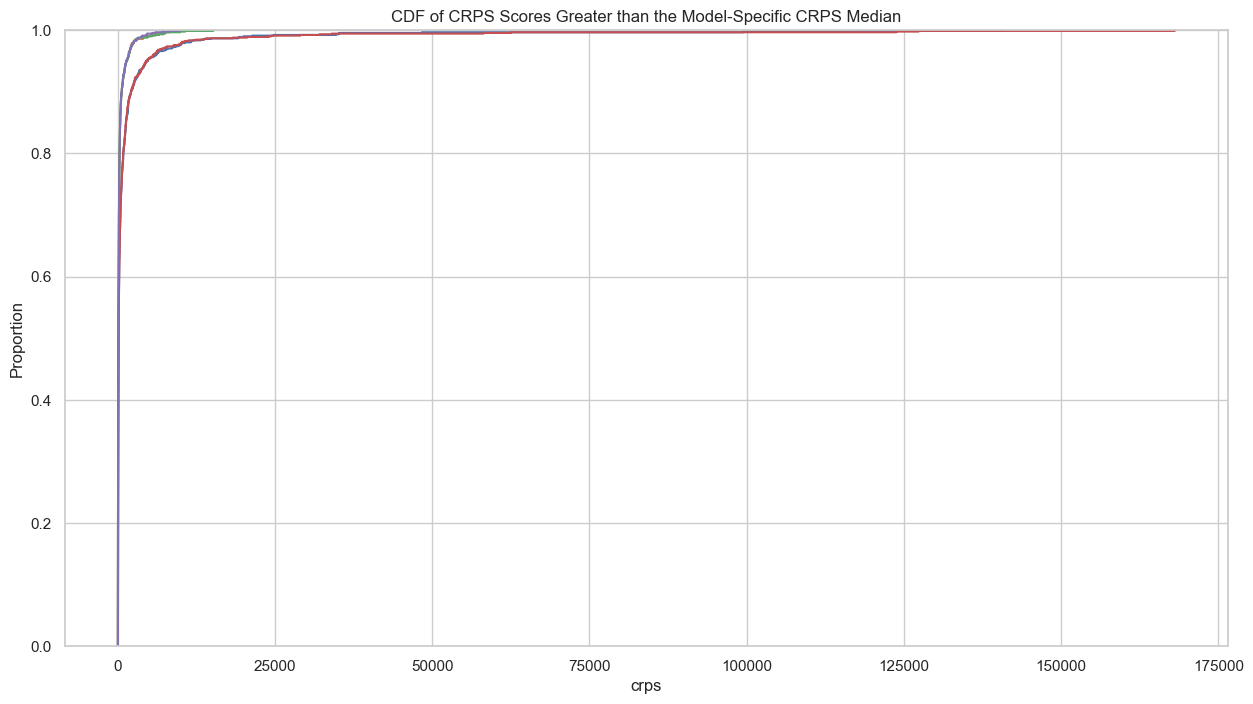

In [141]:
# Plot the cdf of the crps scores which are greater than the model-specific crps median for each model into one plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=metrics[metrics['model_identifier'] == 'model1'][metrics[metrics['model_identifier'] == 'model1']['crps'] > model1_crps_quantiles[0.9]], x='crps', color= sns.color_palette()[0], label='Model 1')
sns.ecdfplot(data=metrics[metrics['model_identifier'] == 'model2'][metrics[metrics['model_identifier'] == 'model2']['crps'] > model2_crps_quantiles[0.9]], x='crps', color= sns.color_palette()[1], label='Model 2')
sns.ecdfplot(data=metrics[metrics['model_identifier'] == 'model3'][metrics[metrics['model_identifier'] == 'model3']['crps'] > model3_crps_quantiles[0.9]], x='crps', color= sns.color_palette()[2], label='Model 3')
sns.ecdfplot(data=metrics[metrics['model_identifier'] == 'model4'][metrics[metrics['model_identifier'] == 'model4']['crps'] > model4_crps_quantiles[0.9]], x='crps', color= sns.color_palette()[3], label='Model 4')
sns.ecdfplot(data=metrics[metrics['model_identifier'] == 'model5'][metrics[metrics['model_identifier'] == 'model5']['crps'] > model5_crps_quantiles[0.9]], x='crps', color= sns.color_palette()[4], label='Model 5')
plt.title('CDF of CRPS Scores Greater than the Model-Specific CRPS Median')

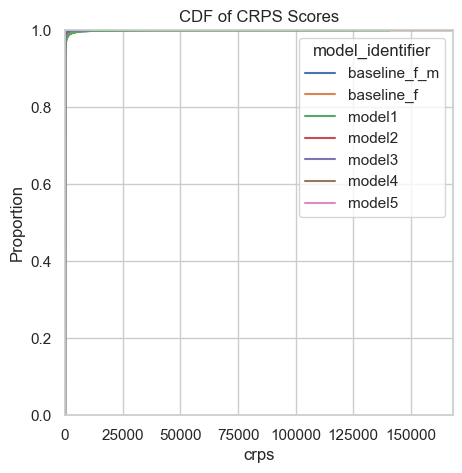

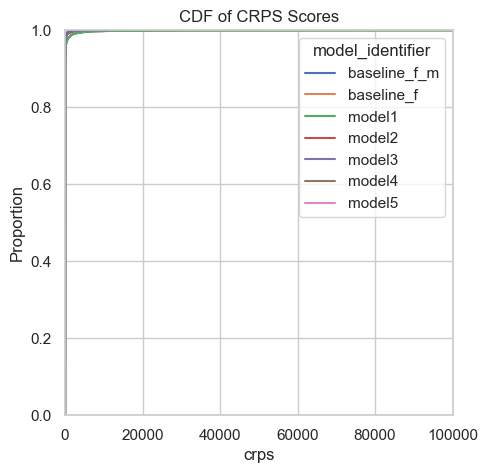

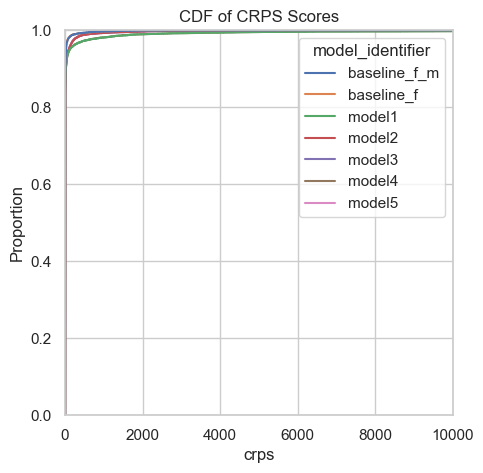

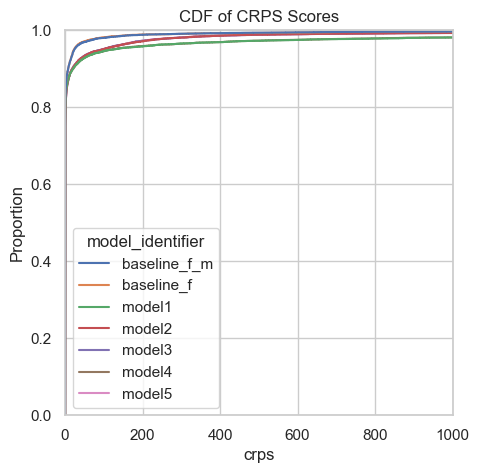

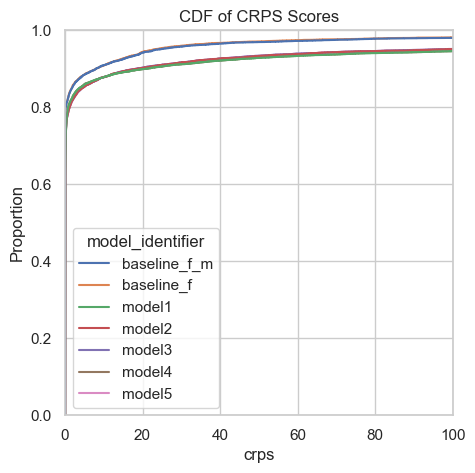

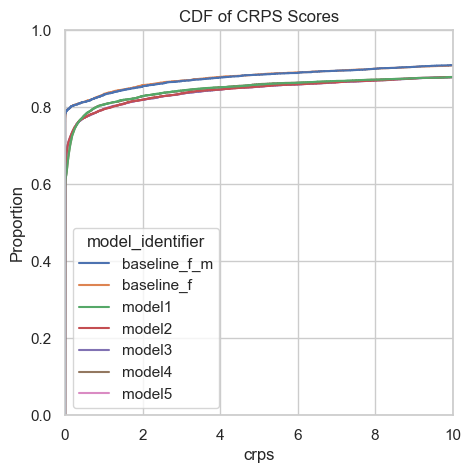

In [157]:
xlims= [None, 100000, 10000, 1000, 100, 10]
for xlim in xlims:
    cfd_plot(data=metrics, x='crps', hue='model_identifier', xlim=xlim)

In [160]:
# Calculate the average crps scores and quantiles for each model for observations with 0 fatalities and store the results in a dataframe
zero_fatalities_metrics = pd.DataFrame(columns=['model_identifier', 'mean_crps', '25th_quantile_crps', '50th_quantile_crps', '75th_quantile_crps', '95th_quantile_crps', '99th_quantile_crps', 'max'])
for model_identifier in model_identifiers_all:
    mean_crps = metrics[(metrics['model_identifier'] == model_identifier) & (metrics['ged_sb'] == 0)]['crps'].mean()
    quantiles_crps = metrics[(metrics['model_identifier'] == model_identifier) & (metrics['ged_sb'] == 0)]['crps'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])
    quantiles_crps = quantiles_crps.round(4)
    max_crps = metrics[(metrics['model_identifier'] == model_identifier) & (metrics['ged_sb'] == 0)]['crps'].max()
    zero_fatalities_metrics = zero_fatalities_metrics.append({'model_identifier': model_identifier, 'mean_crps': mean_crps, '25th_quantile_crps': quantiles_crps[0.25], '50th_quantile_crps': quantiles_crps[0.5], '75th_quantile_crps': quantiles_crps[0.75], '95th_quantile_crps': quantiles_crps[0.95], '99th_quantile_crps': quantiles_crps[0.99], 'max': max_crps}, ignore_index=True)

In [161]:
zero_fatalities_metrics

,model_identifier,mean_crps,25th_quantile_crps,50th_quantile_crps,75th_quantile_crps,95th_quantile_crps,99th_quantile_crps,max
0,baseline_f_m,0.219598,0.0,0.0,0.0000,0.1816,6.3653,40.046118
1,baseline_f,0.188105,0.0,0.0,0.0000,0.1723,3.8083,33.192115
2,model1,10.657152,0.0,0.0,0.0432,1.0525,11.2771,35101.930286
3,model2,0.564134,0.0,0.0,0.0089,1.6230,11.2262,226.111007
4,model3,0.632398,0.0,0.0,0.0078,1.6510,11.3421,610.744613
5,model4,13.760509,0.0,0.0,0.0441,1.0360,11.4694,58166.633827
6,model5,0.555149,0.0,0.0,0.0091,1.6741,10.8521,252.710041
